# Problem 1:
## Clustering:
### Digital Ads Data:

#### The ads24x7 is a Digital Marketing company which has now got seed funding of 10 Million They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_excel("Clustering Clean Ads_Data-2.xlsx",engine='openpyxl')

In [3]:
data_df.head(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0,0.0031,0.00,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0,0.0035,0.00,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0,0.0028,0.00,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0,0.0020,0.00,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0,0.0041,0.00,0.00
5,2020-9-4-5,Format1,300,250,75000,Inter219,Video,Desktop,Display,490,64,64,2,0.00,0.35,0.0,0.0313,0.01,0.00
6,2020-9-4-6,Format1,300,250,75000,Inter221,App,Mobile,Video,1197,202,202,1,0.01,0.35,0.0,0.0050,0.03,0.01
7,2020-9-6-7,Format1,300,250,75000,Inter228,Video,Mobile,Video,1363,198,196,1,0.00,0.35,0.0,0.0051,0.00,0.00
8,2020-9-8-6,Format1,300,250,75000,Inter223,Web,Mobile,Video,1402,137,136,1,0.00,0.35,0.0,0.0074,0.02,0.00
9,2020-9-11-17,Format1,300,250,75000,Inter228,Video,Mobile,Display,1816,312,311,1,0.00,0.35,0.0,0.0032,0.00,0.00


In [4]:
data_df.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,2020-11-23-4,Format4,120,600,72000,Inter223,Web,Mobile,Video,2,2,2,1,0.10,0.35,0.0650,NaN,NaN,NaN
23057,2020-11-20-2,Format4,120,600,72000,Inter224,Web,Desktop,Display,5,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23058,2020-11-4-3,Format5,720,300,216000,Inter223,Web,Mobile,Video,1,1,1,1,0.08,0.35,0.0520,NaN,NaN,NaN
23059,2020-11-13-4,Format5,720,300,216000,Inter228,Video,Mobile,Display,2,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23060,2020-11-16-5,Format4,120,600,72000,Inter225,Video,Mobile,Display,4,4,4,1,0.14,0.35,0.0910,NaN,NaN,NaN
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [5]:
data_df.shape

(23066, 19)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [7]:
data_df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [8]:
data_df.duplicated().sum()

0

In [9]:
data_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [10]:
def remove_null(row):
    if row['CTR'] == 'NaN':
        return (row['Clicks']/row['Impressions'] *100)
    elif row['CPM'] == 'NaN':
        return ((row['Spend']/row['Impressions']) *1000)
    elif row['CPC'] == 'NaN':
        return (row['Spend']/row['Clicks'])
    return row['CTR'], row['CPM'], row['CPC']

In [11]:
data_df['CTR'] = data_df.apply(remove_null, axis=1)
data_df['CPM'] = data_df.apply(remove_null, axis=1)
data_df['CPC'] = data_df.apply(remove_null, axis=1)

In [12]:
data_df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [13]:
data_df.drop(['Timestamp' , 'InventoryType', 'Ad Type', 'Platform' , 'Device Type','Format','CTR','CPM','CPC'], axis=1, inplace=True)

## Check if there are any outliers. 

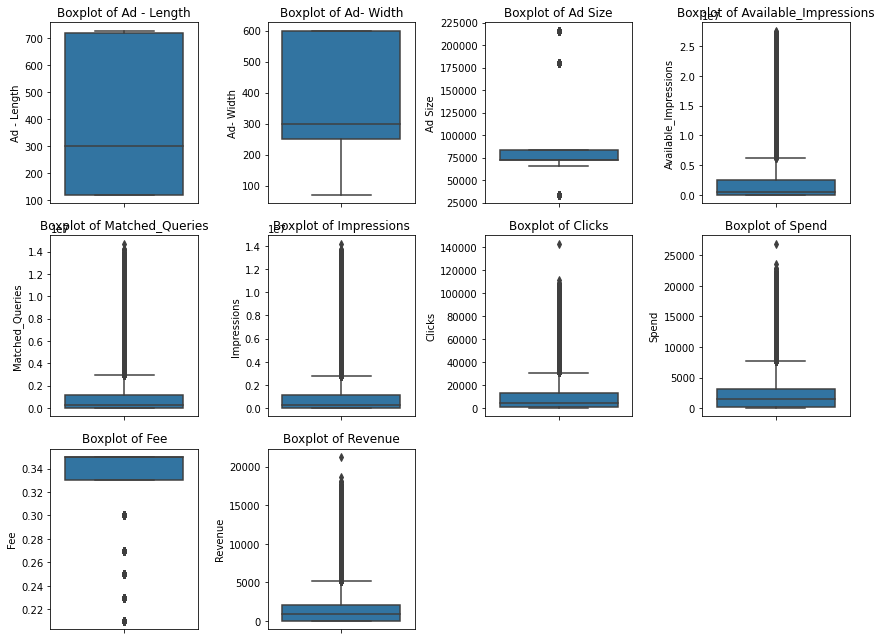

In [14]:
plt.figure(figsize = (12,9))
feature_list = data_df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = data_df[feature_list[i]], data = data_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [15]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [16]:
for i in feature_list:
    LL, UL = remove_outlier(data_df[i])
    data_df[i] = np.where(data_df[i] > UL, UL, data_df[i])
    data_df[i] = np.where(data_df[i] < LL, LL, data_df[i])

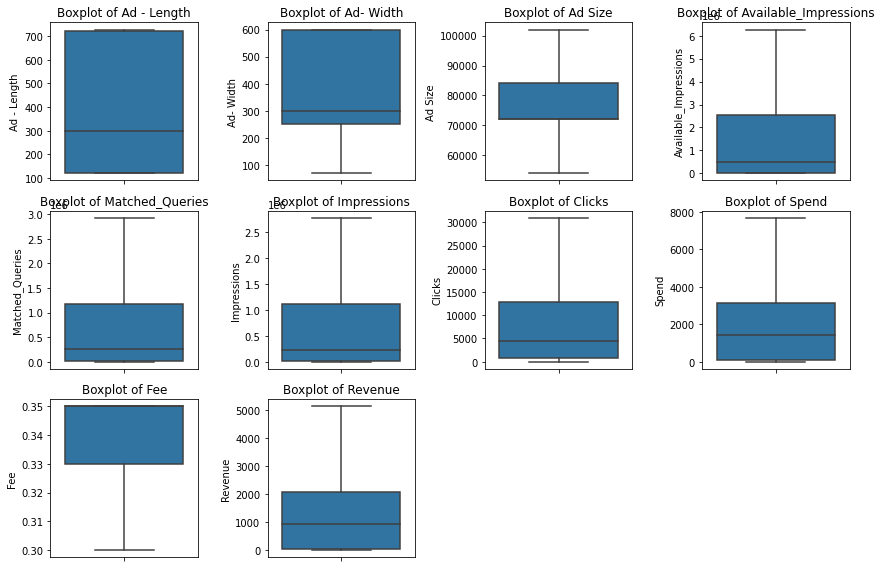

In [17]:
plt.figure(figsize = (12,8))
feature_list = data_df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = data_df[feature_list[i]], data = data_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [18]:
from scipy.stats import zscore
scaled_data1 = data_df.apply(zscore)

In [19]:
scaled_data1.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093


## Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
wardlink = linkage(data_df, method = 'ward')

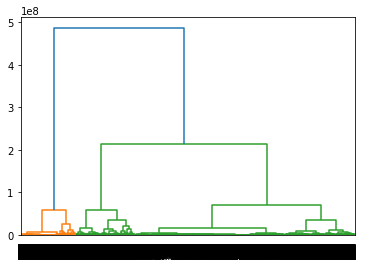

In [22]:
dend = dendrogram(wardlink)

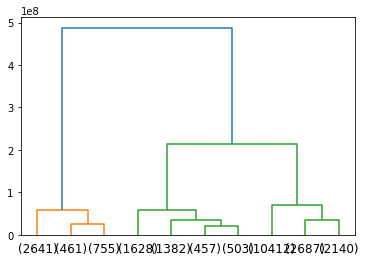

In [23]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

## Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [25]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_data1)
round(k_means.inertia_,2)

230660.0

In [26]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_data1)
round(k_means.inertia_,2)

96112.62

In [27]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_data1)
round(k_means.inertia_,2)

68272.86

In [28]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_data1)
round(k_means.inertia_,2)

41872.78

In [29]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_data1)
round(k_means.inertia_,2)

32963.23

WSS reduces as K keeps increasing

### Calculating WSS for other values of K - Elbow Method

In [30]:
wss = []

In [31]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_data1)
    wss.append(round(KM.inertia_,2))

In [32]:
wss

[230660.0,
 128187.67,
 96112.62,
 68272.86,
 41872.78,
 32963.23,
 27158.84,
 22918.52,
 19603.12,
 17343.85]

In [33]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\ruchi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

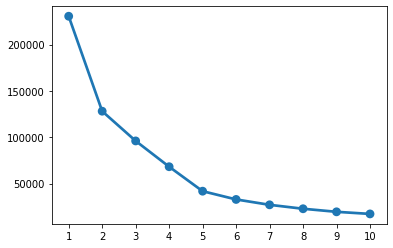

In [34]:
sns.pointplot(a, wss)

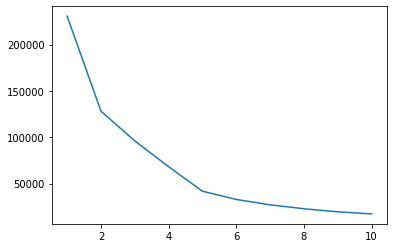

In [35]:
plt.plot(range(1,11), wss)



When we move from k=1 to k=2 , we see that there is a significant drop in the value , also when we move from k=2 to k=3,k=3 to k=4 there is a significant drop aswell.

But from k=4 to k=5 , k=5 to k=6 , the drop in values reduces significantly.

#### In otherwords, the wss is not signicantly dropping beyond 4, so 4 is optimal number of clusters

## Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

#### Let us now find the Silhouette Score for the values of K from 2 to 10

In [39]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_data1)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_data1,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48429517856041593
For n_clusters=3, the silhouette score is 0.41459708788922367
For n_clusters=4, the silhouette score is 0.5109090234114144
For n_clusters=5, the silhouette score is 0.5726186038415385
For n_clusters=6, the silhouette score is 0.5812083376089215
For n_clusters=7, the silhouette score is 0.5856487056283669
For n_clusters=8, the silhouette score is 0.5868317693829973
For n_clusters=9, the silhouette score is 0.5905860410190569
For n_clusters=10, the silhouette score is 0.5985458545287414


In [40]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_data1)
labels = k_means.labels_

In [41]:
data_df["Clus_kmeans4"] = labels
data_df.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,Clus_kmeans4
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,2
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,2
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,2
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,2
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,2


### Cluster Profiling

In [42]:
data_df.Clus_kmeans4.value_counts().sort_index()

0    4658
1    5292
2    7521
3    5595
Name: Clus_kmeans4, dtype: int64

In [43]:
#clust_profile=data_df.drop(['Bank'],axis=1)
clust_profile=data_df.groupby('Clus_kmeans4').mean()
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,freq
Clus_kmeans4,,,,,,,,,,,
0,685.494204,303.273937,100813.653929,2.532500e+05,1.389376e+05,1.179017e+05,14269.395690,1272.063188,0.349420,828.875578,4658
1,386.250945,289.580499,73231.496599,4.553790e+06,2.286442e+06,2.160562e+06,15998.666572,6070.052069,0.310085,4117.449628,5292
2,158.804946,549.508044,74836.457918,1.037363e+05,5.787606e+04,4.963506e+04,2755.484178,372.310051,0.349330,244.709748,7521
3,438.378552,127.962466,61902.627346,1.968614e+06,9.400959e+05,8.984139e+05,3529.850581,1628.992395,0.349099,1061.785327,5595


•	The dataset has 25857 rows and 19 columns.

•	The missing values in CPC, CTR and CPM are treated by using the formulae given and writing a user-defined function and           calling it.

•	We check for outliers; we can see there are outliers in the variables.

•	Dendrogram is the visualization and linkage is for computing the distances and merging the clusters from n to 1.

•	The output of Linkage is visualized by Dendrogram.

•	We will create linkage using Ward’s method and run linkage function on the usable columns of the data.

•	The linkage now stores the various distance at which the n clusters are sequentially merged into a single cluster.

•	using fit – transform function and viewing the output - The data frame is now stored in an array.

•	Using this array, we can now perform k-means.

•	The one requirement before we run the k-means algorithm, is to know how many clusters we require as output.

•	We map the elbow plot using WSS values.

•	From the plot we have following observations:

•	When we move from k=1 to k=2, we see that there is a significant drop in the value, also when we move from k=2 to k=3, k=3       to k=4 there is a significant drop as well.

•	But from k=4 to k=5, k=5 to k=6, the drop in values reduces significantly.

•	In other words, the WSS is not significantly dropping beyond 4,

•	 So, 4 is optimal number of clusters.



# Problem 2 

### PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

### Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [44]:
data = pd.read_excel("PCA India Data_Census.xlsx",engine='openpyxl')

In [45]:
data.head(10)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478
5,1,6,Jammu & Kashmir,Rajouri,16345,25290,37426,6155,5294,2588,...,1808,3536,1277,2374,229,256,19,71,283,835
6,1,7,Jammu & Kashmir,Kathua,12510,22793,30491,3928,3200,5357,...,502,561,160,283,133,120,11,19,198,139
7,1,8,Jammu & Kashmir,Baramula,9414,22960,30509,4246,4099,0,...,849,878,168,321,385,265,50,94,246,198
8,1,9,Jammu & Kashmir,Bandipore,3814,10319,13058,1646,1779,0,...,515,901,108,280,218,234,49,144,140,243
9,1,10,Jammu & Kashmir,Srinagar,15095,39014,52278,6269,5704,11,...,308,432,10,29,36,22,16,134,246,247


In [46]:
data.tail(10)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
630,33,631,Tamil Nadu,Krishnagiri,65952,82958,134294,10629,10083,13602,...,1027,2295,101,140,341,1139,76,223,509,793
631,33,632,Tamil Nadu,Coimbatore,133255,125297,239223,12101,11624,21087,...,723,2137,8,46,115,664,37,225,563,1202
632,33,633,Tamil Nadu,Tiruppur,98258,77174,163526,7201,6957,13016,...,401,1574,5,29,69,499,17,171,310,875
633,34,634,Puducherry,Yanam,2219,2618,4659,281,275,496,...,11,30,0,0,3,11,0,1,8,18
634,34,635,Puducherry,Puducherry,37786,47268,80943,5629,5407,10062,...,528,951,10,14,180,503,11,46,327,388
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [47]:
data.shape

(640, 61)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [49]:
data.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [50]:
data.duplicated().sum()

0

In [51]:
data.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

 ### Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? 

Which state has highest population?

<AxesSubplot:xlabel='State', ylabel='count'>

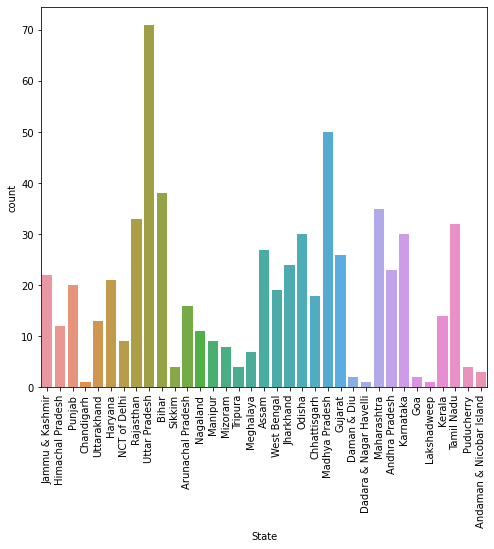

In [52]:
plt.figure(figsize=(8,7))
plt.xticks(rotation=90)
sns.countplot(data=data,x='State')

Which state has highest Total population of Female?
 
Which state has lowest Total population of Female? 

<AxesSubplot:xlabel='State', ylabel='TOT_F'>

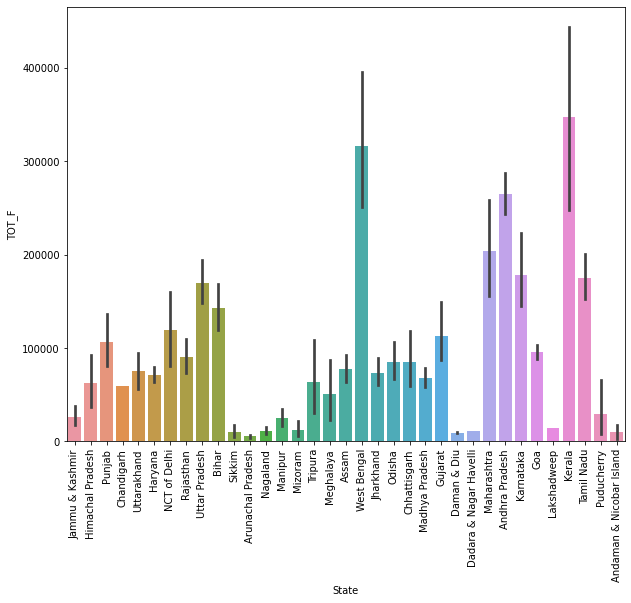

In [53]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(data=data, x='State', y='TOT_F')

Which state has highest Total population of Male?
 
Which state has lowest Total population of Male? 

<AxesSubplot:xlabel='State', ylabel='TOT_M'>

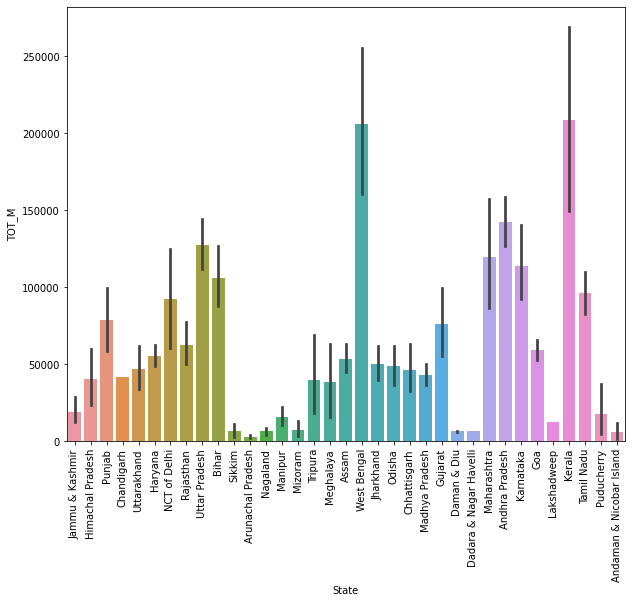

In [54]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(data=data, x='State', y='TOT_M')

Which state has highest Literate population of Female?
 
Which state has lowest Literate population of Female? 

<AxesSubplot:xlabel='State', ylabel='F_LIT'>

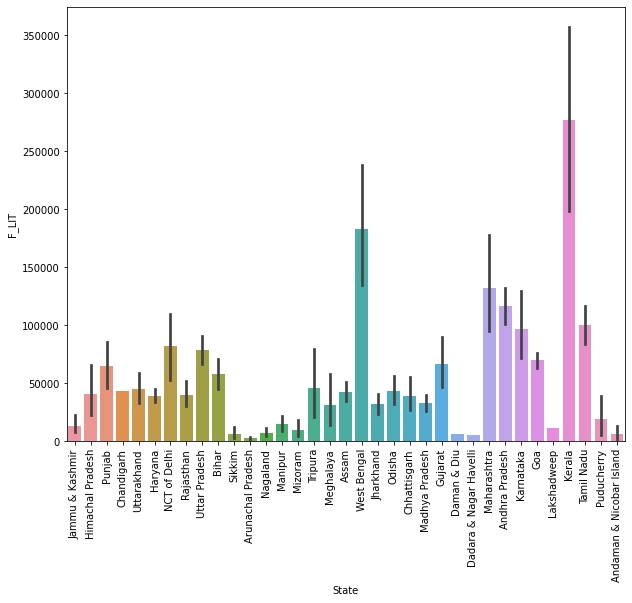

In [55]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(data=data,x='State', y='F_LIT')

Which state has highest Literate population of Male?
 
Which state has lowest Literate population of Male? 

<AxesSubplot:xlabel='State', ylabel='M_LIT'>

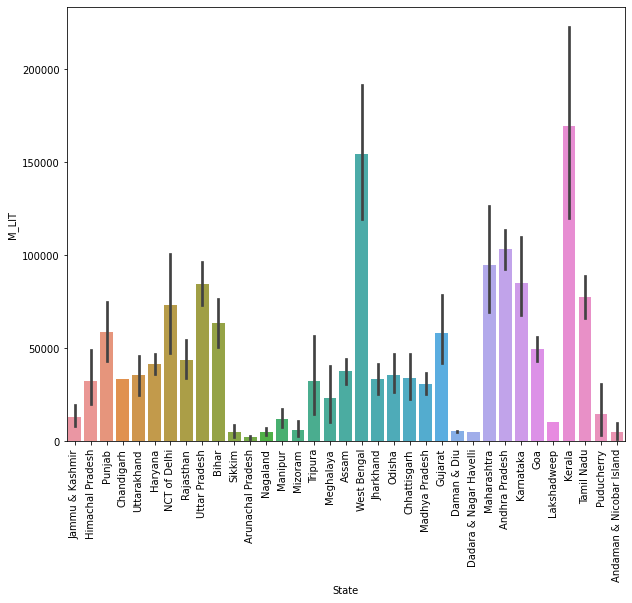

In [56]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(data=data,x='State', y='M_LIT')

In [57]:
data.drop(['State', 'Area Name'], axis=1,inplace=True)

### Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

Outliers Before Scaling

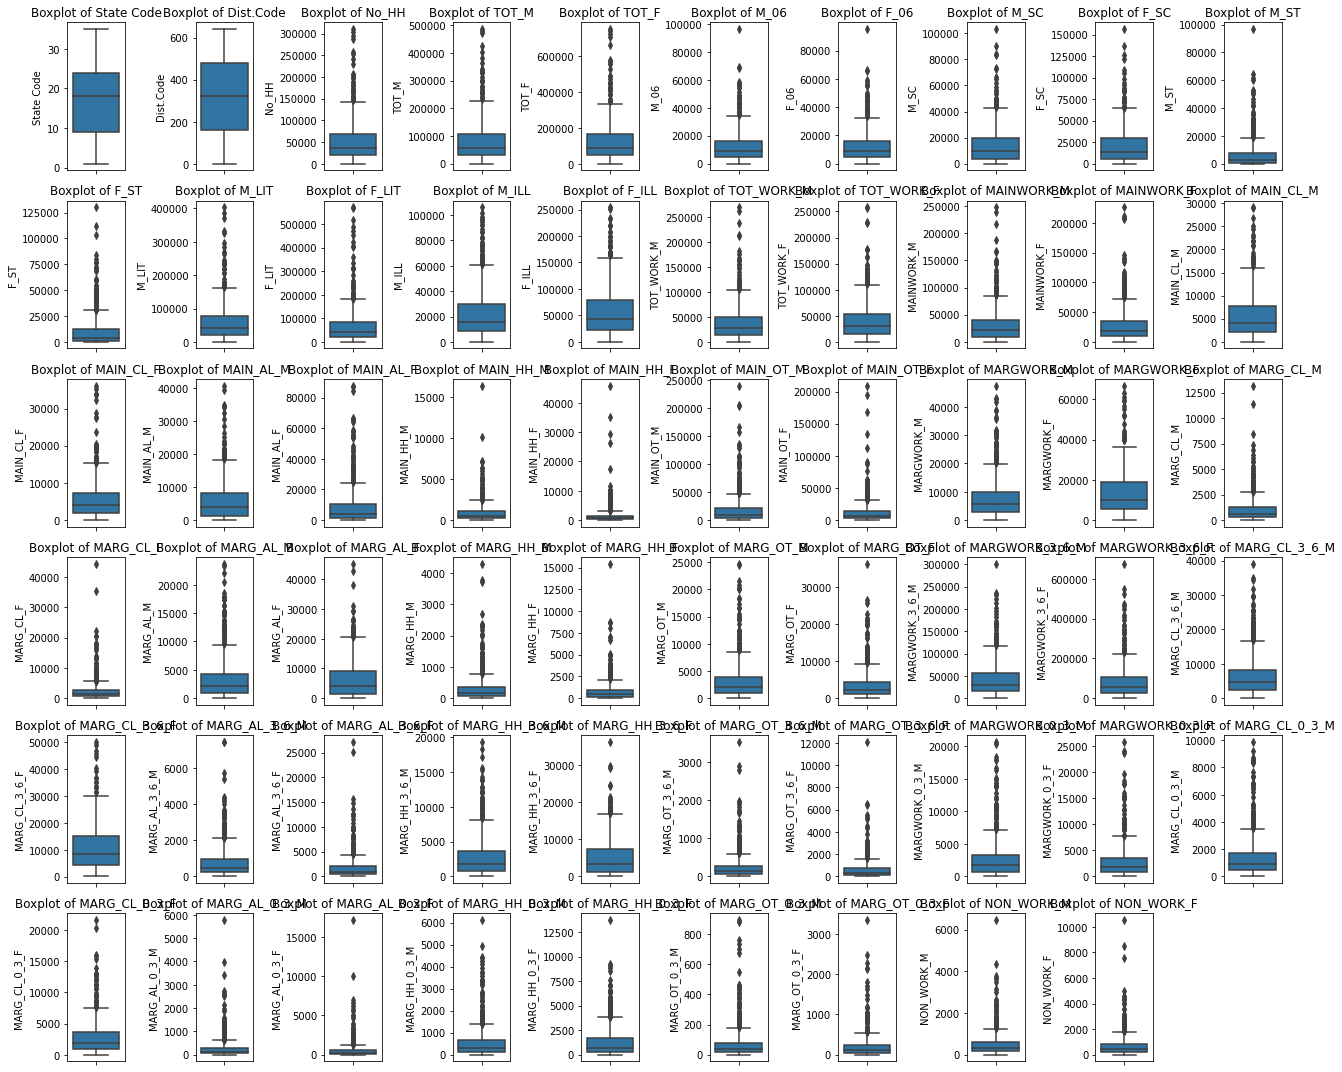

In [58]:
plt.figure(figsize = (18,15))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(6, 10, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [59]:
from scipy.stats import zscore
scaled_data = data.apply(zscore)

In [60]:
scaled_data.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


Outliers after scaling

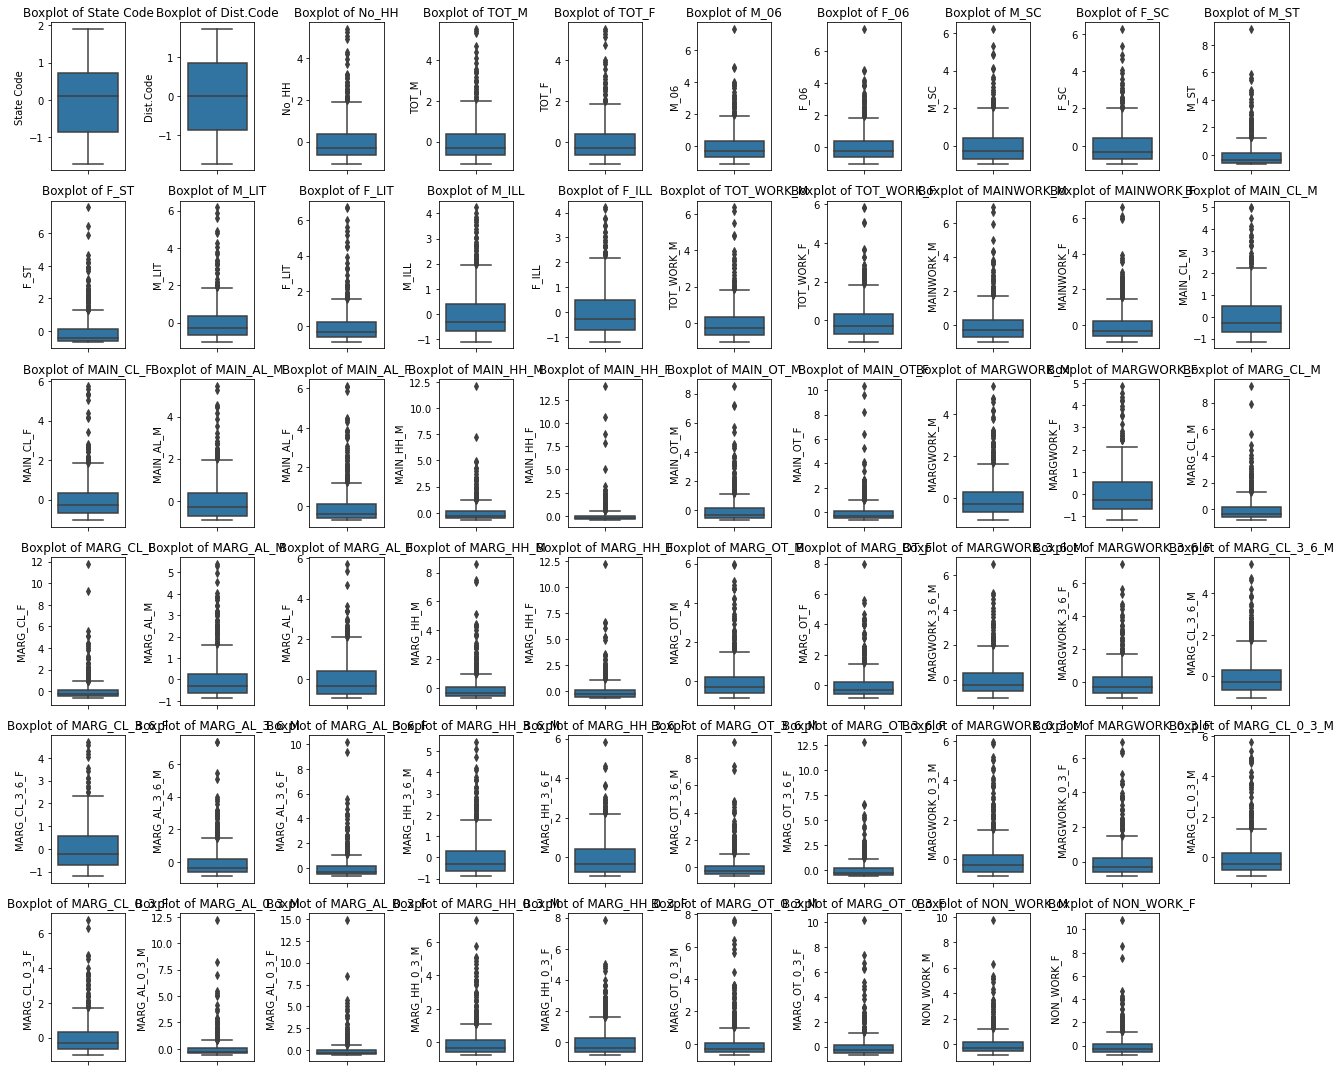

In [61]:
plt.figure(figsize = (18,15))
feature_list = scaled_data.columns
for i in range(len(feature_list)):
    plt.subplot(6, 10, i + 1)
    sns.boxplot(y = scaled_data[feature_list[i]], data = scaled_data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [62]:
corr = scaled_data.corr(method='pearson')

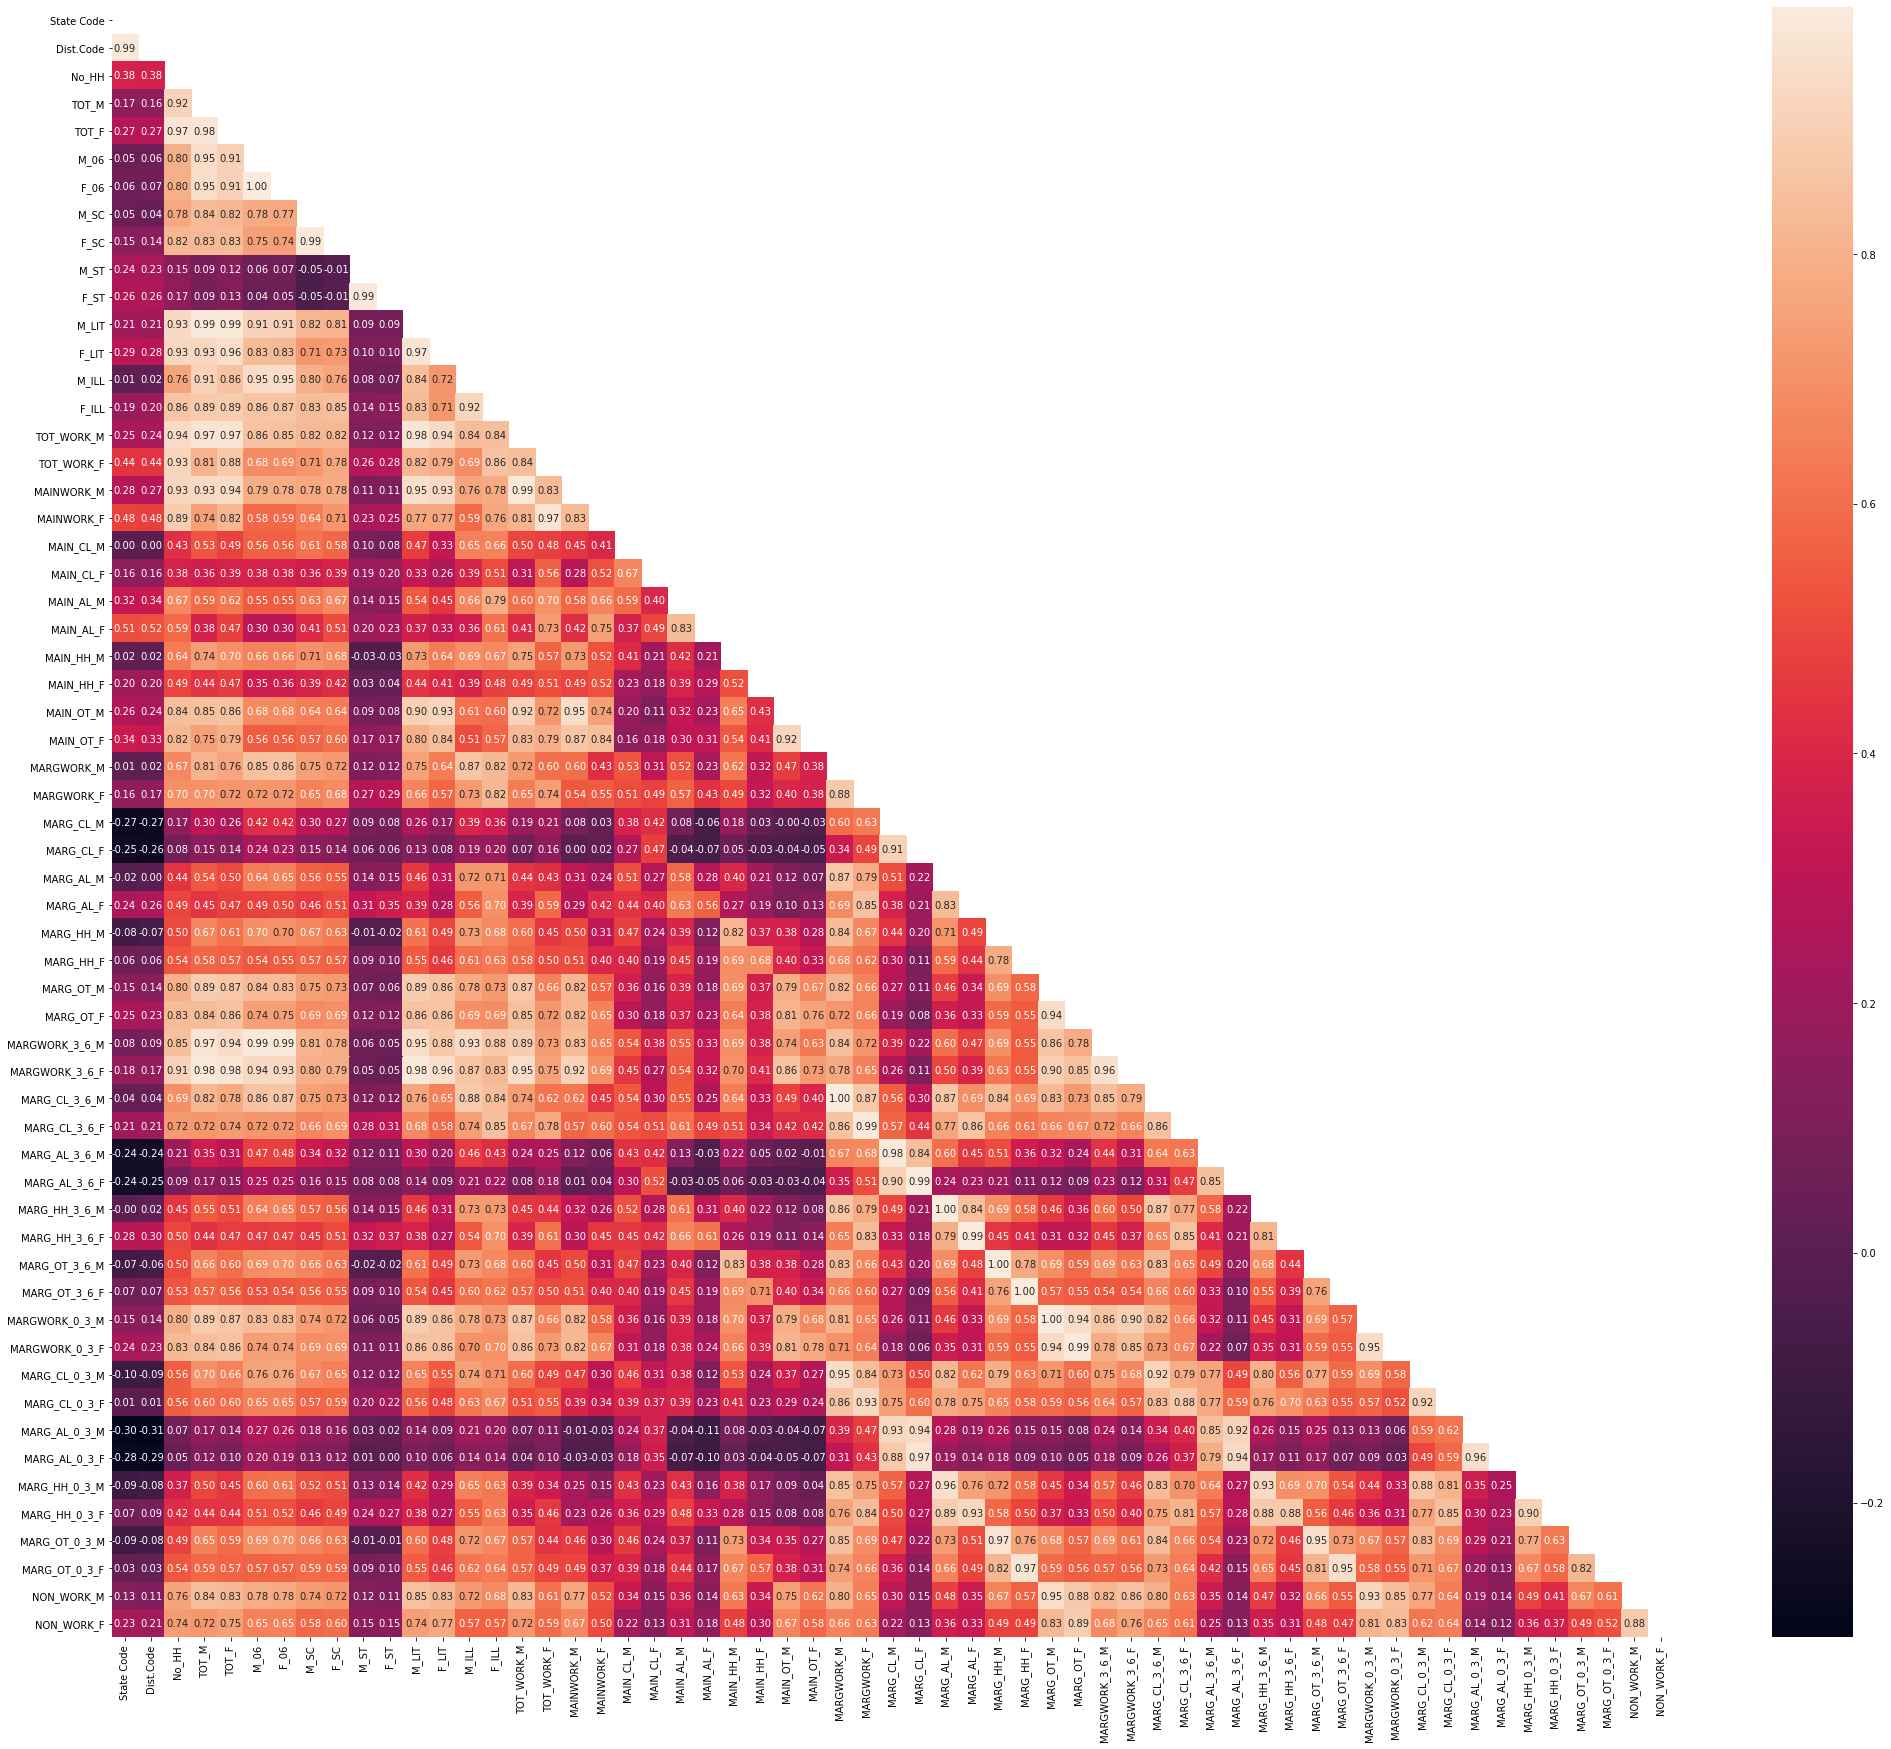

In [63]:
#Check for presence of correlations
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(35, 30))
sns.heatmap(scaled_data.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [64]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(scaled_data)

In [65]:
#Extract eigen vectors
pca.components_

array([[ 3.00700521e-02,  3.00751392e-02,  1.56432451e-01,
         1.67038499e-01,  1.65701886e-01,  1.61870848e-01,
         1.62266320e-01,  1.51067631e-01,  1.51483487e-01,
         2.76635864e-02,  2.86559949e-02,  1.62028968e-01,
         1.47117900e-01,  1.61354631e-01,  1.65216191e-01,
         1.59988739e-01,  1.46484663e-01,  1.46446784e-01,
         1.24700922e-01,  1.02841551e-01,  7.46387972e-02,
         1.13762012e-01,  7.47868720e-02,  1.31280497e-01,
         8.36015471e-02,  1.23789890e-01,  1.11498595e-01,
         1.64144005e-01,  1.55258801e-01,  8.14703494e-02,
         4.84108523e-02,  1.28166982e-01,  1.14462067e-01,
         1.40274353e-01,  1.27424449e-01,  1.55154856e-01,
         1.47413552e-01,  1.64714317e-01,  1.61211005e-01,
         1.65089659e-01,  1.55618244e-01,  9.21330578e-02,
         5.07812312e-02,  1.28188765e-01,  1.10910853e-01,
         1.39029295e-01,  1.24330759e-01,  1.54196780e-01,
         1.46411774e-01,  1.49444956e-01,  1.39705021e-0

In [66]:
#Check the eigen values
pca.explained_variance_

array([31.86742634,  8.18907061,  4.54275124,  3.84336785,  2.27105793,
        1.95992589,  1.37548006,  0.88734267,  0.71989796,  0.61405955,
        0.49439969,  0.42414799])

### Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [67]:
#Check the explained variance for each PC
pca.explained_variance_ratio_

array([0.53928192, 0.13858094, 0.07687548, 0.06504004, 0.03843236,
       0.03316718, 0.02327679, 0.01501621, 0.0121826 , 0.01039153,
       0.00836656, 0.00717772])

In [68]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = scaled_data.columns)

In [69]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
State Code,0.030070,-0.162783,-0.250129,0.120049,0.145753,0.090244,-0.352205,-0.386295,0.181864,0.037733,0.159750,0.081100
Dist.Code,0.030075,-0.158822,-0.259360,0.110852,0.136167,0.079450,-0.351971,-0.392440,0.203407,0.065440,0.149476,0.060769
No_HH,0.156432,-0.128322,-0.033498,0.101335,-0.022504,-0.000996,-0.054283,0.116661,0.020509,0.000216,0.022453,-0.000029
TOT_M,0.167038,-0.080861,0.063630,0.033299,-0.049227,-0.074100,0.069576,-0.007883,0.117189,0.030459,-0.004240,-0.008208
TOT_F,0.165702,-0.101111,0.024403,0.071948,-0.027928,-0.046350,0.008746,0.033156,0.086646,0.025439,-0.015019,0.000652
M_06,0.161871,-0.012753,0.070453,0.007703,-0.069415,-0.152284,0.088987,-0.088322,0.230863,-0.018073,-0.095920,-0.084729
F_06,0.162266,-0.011674,0.063515,0.002417,-0.062113,-0.149228,0.088532,-0.100682,0.239291,-0.016980,-0.104345,-0.083852
M_SC,0.151068,-0.035627,0.035345,-0.024603,-0.185394,-0.045912,0.015994,0.079119,-0.239926,-0.037393,0.329603,0.256582
F_SC,0.151483,-0.047732,-0.009677,0.002284,-0.170823,-0.022720,-0.043008,0.113026,-0.259835,-0.033859,0.339877,0.251012
M_ST,0.027664,0.008893,-0.201756,0.142128,0.372538,0.110757,0.504502,-0.061719,0.001861,0.001838,0.159830,-0.045772


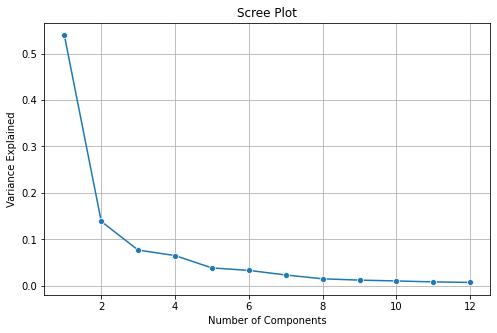

In [70]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [71]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.53928192, 0.67786286, 0.75473834, 0.81977838, 0.85821074,
       0.89137792, 0.91465472, 0.92967092, 0.94185352, 0.95224504,
       0.96061161, 0.96778932])

In [72]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [73]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5
State Code,0.030070,-0.162783,-0.250129,0.120049,0.145753
Dist.Code,0.030075,-0.158822,-0.259360,0.110852,0.136167
No_HH,0.156432,-0.128322,-0.033498,0.101335,-0.022504
TOT_M,0.167038,-0.080861,0.063630,0.033299,-0.049227
TOT_F,0.165702,-0.101111,0.024403,0.071948,-0.027928
M_06,0.161871,-0.012753,0.070453,0.007703,-0.069415
F_06,0.162266,-0.011674,0.063515,0.002417,-0.062113
M_SC,0.151068,-0.035627,0.035345,-0.024603,-0.185394
F_SC,0.151483,-0.047732,-0.009677,0.002284,-0.170823
M_ST,0.027664,0.008893,-0.201756,0.142128,0.372538


### Compare PCs with Actual Columns and identify which is explaining most variance

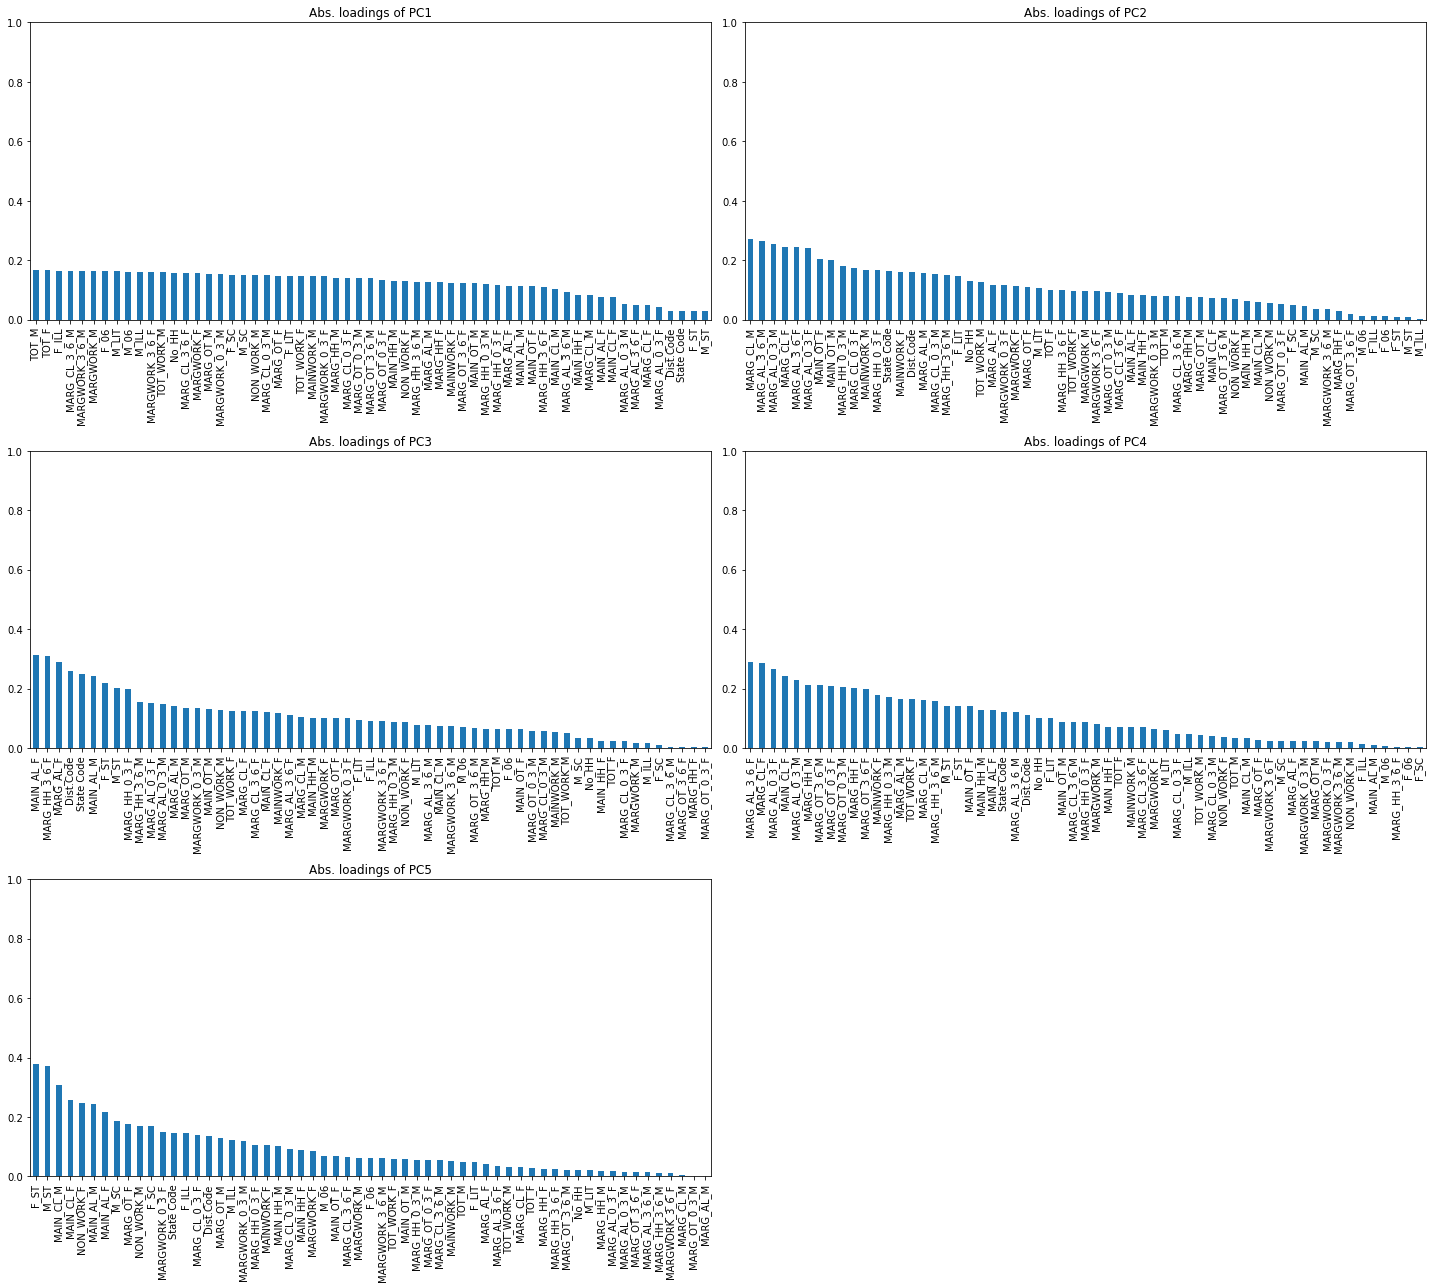

In [74]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (20,18))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

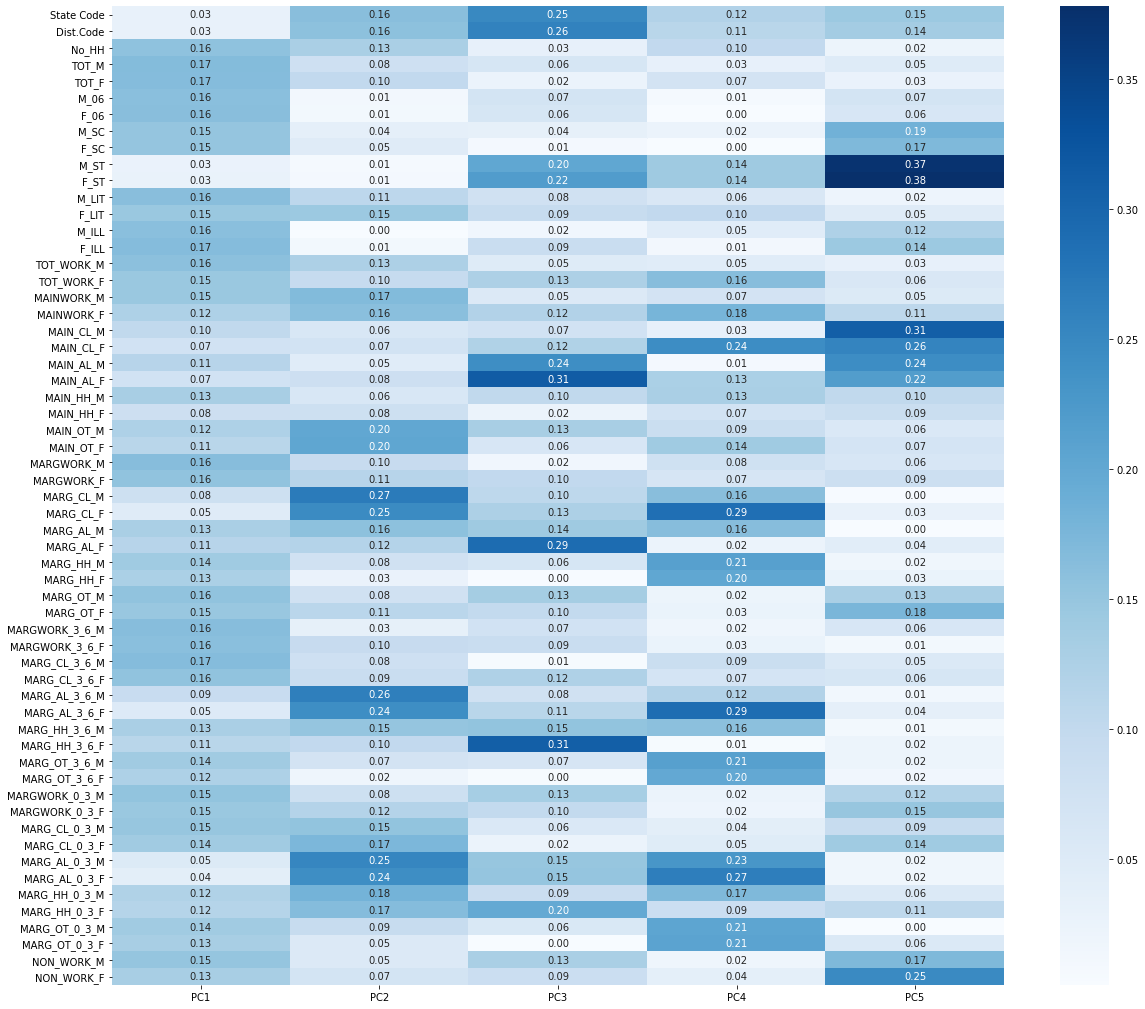

In [75]:
#Compare how the original features influence various PCs
plt.figure(figsize = (20,18))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [76]:
#In order to calculate PC scores we need loadings, below:
df_selected

,PC1,PC2,PC3,PC4,PC5
State Code,0.030070,-0.162783,-0.250129,0.120049,0.145753
Dist.Code,0.030075,-0.158822,-0.259360,0.110852,0.136167
No_HH,0.156432,-0.128322,-0.033498,0.101335,-0.022504
TOT_M,0.167038,-0.080861,0.063630,0.033299,-0.049227
TOT_F,0.165702,-0.101111,0.024403,0.071948,-0.027928
M_06,0.161871,-0.012753,0.070453,0.007703,-0.069415
F_06,0.162266,-0.011674,0.063515,0.002417,-0.062113
M_SC,0.151068,-0.035627,0.035345,-0.024603,-0.185394
F_SC,0.151483,-0.047732,-0.009677,0.002284,-0.170823
M_ST,0.027664,0.008893,-0.201756,0.142128,0.372538


In [77]:
#...and we need the original scaled features
scaled_data.iloc[0]

State Code       -1.710782
Dist.Code        -1.729347
No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
M

In [78]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(scaled_data)

In [79]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-4.719381,0.717504,1.632266,-1.524984,0.090256
1,-4.873297,0.492001,1.752127,-1.938533,-0.262973
2,-6.062948,0.233751,1.333068,-0.710272,0.152168
3,-6.378387,0.042766,1.404373,-1.187672,0.013921
4,-4.581259,1.431602,1.722496,-0.231724,0.579575
5,-3.429451,3.370505,2.725939,1.662326,0.711022
6,-5.120804,0.230986,1.759260,-0.917209,-0.343377
7,-4.709479,0.602594,1.706348,-1.520298,-0.033930
8,-5.286297,0.506676,1.568660,-1.746378,0.037731
9,-4.323849,-0.705453,2.108597,-1.356074,0.027921


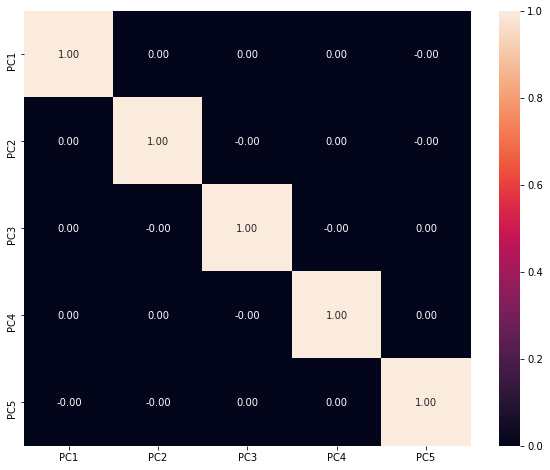

In [80]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');